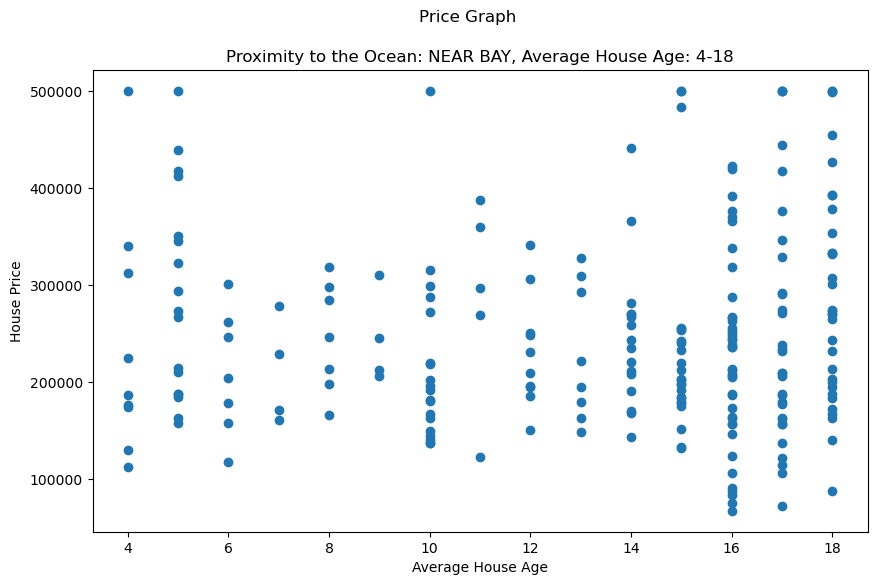

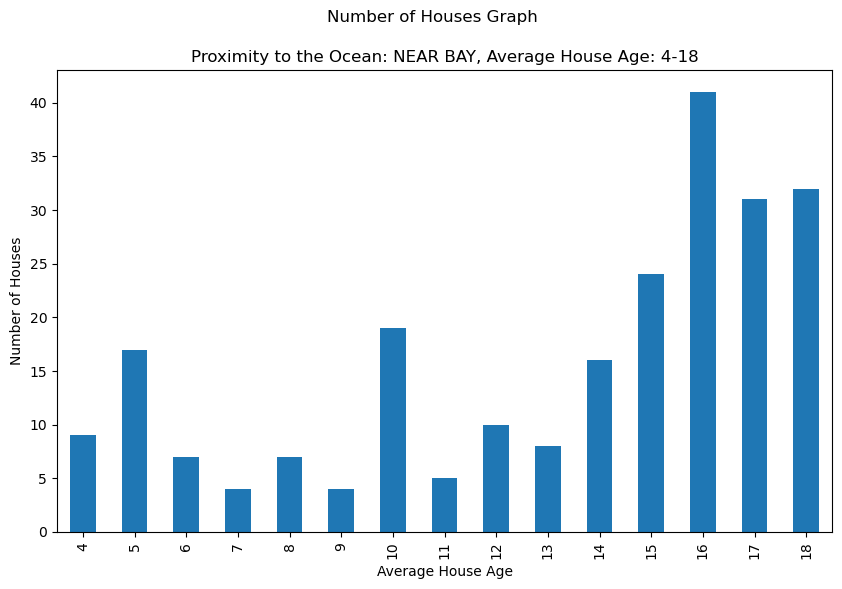

In [1]:
"""
California House Prices 1-4-5
Gozde Nur ATIL
Asli IZCI
"""

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import *
from tkinter import ttk

file_path = "1553768847-housing.csv"
data = pd.read_csv(file_path)

root = Tk()
root.geometry("600x400")
root.title("House Prices in California")

def plot_graph(kind):
    selected_ocean_proximity = ocean_proximity_combo.get()
    lower_age_limit = age_scale_lower.get()
    upper_age_limit = age_scale_upper.get()
    if lower_age_limit > upper_age_limit:
        lower_age_limit, upper_age_limit = upper_age_limit, lower_age_limit

    filtered_data = data[(data["ocean_proximity"] == selected_ocean_proximity) &
                         (data["housing_median_age"] >= lower_age_limit) &
                         (data["housing_median_age"] <= upper_age_limit)]

    plt.figure(figsize=(10, 6))

    if kind == "scatter":
        plt.scatter(filtered_data["housing_median_age"], filtered_data["median_house_value"])
        plt.suptitle("Price Graph")
    elif kind == "bar":
        filtered_data["housing_median_age"].value_counts().sort_index().plot(kind="bar")
        plt.suptitle("Number of Houses Graph")

    plt.title(f"Proximity to the Ocean: {selected_ocean_proximity}, Average House Age: {lower_age_limit}-{upper_age_limit}")
    plt.xlabel("Average House Age")
    plt.ylabel("House Price" if kind == "scatter" else "Number of Houses")

    top = Toplevel(root)

    # Matplotlib - Tkinter 
    canvas = FigureCanvasTkAgg(plt.gcf(), master=top)
    canvas.draw()

    # Matplotlib graph
    canvas.get_tk_widget().pack(side=TOP, fill=BOTH, expand=1)

ocean_proximity_label = Label(root, text="Choose Proximity to the Ocean:")
ocean_proximity_label.pack(pady=10)

# ComboBox
ocean_proximity_columns = list(data["ocean_proximity"].unique())
ocean_proximity_combo = ttk.Combobox(root, values=ocean_proximity_columns)
ocean_proximity_combo.pack(pady=10)

# Two scales for the age range
def create_scale(root, label_text, from_, to):
    label = Label(root, text=label_text)
    label.pack(pady=10)
    scale = Scale(root, from_=from_, to=to, orient=HORIZONTAL)
    scale.pack(pady=10)
    return scale

age_scale_lower = create_scale(root, "Lower Age Limit:", 0, 51)
age_scale_upper = create_scale(root, "Upper Age Limit:", 1, 52)

# Buttons
plot_scatter_button = Button(root, text="Create Price Scatter Graph", command=lambda: plot_graph("scatter"))
plot_scatter_button.pack(pady=10)

plot_bar_button = Button(root, text="Create House Count Bar Graph", command=lambda: plot_graph("bar"))
plot_bar_button.pack(pady=10)

root.mainloop()
